## MAGMA experimnetations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from magma import MAGMA

### Common HP + Exponentiated Quadratic Kernel

In [2]:
N = 100
M = 5

t0 = 0
tN = 10 + 1e-3

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(100,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
print(m0.shape)

(100,)


In [4]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(5))])
print(theta0)

[114.28501576 138.55274018]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(100, 100)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(100,)


In [7]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[73.34639676  1.41479013]
0.8570260537609993


In [8]:
Y = np.zeros((M, N))
for i in range(M):
    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, common_T)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(N)
    Yi = np.random.multivariate_normal(mu0, Psi_Theta_Sigma)
    Y[i] = Yi
print(Y.shape)

(5, 100)


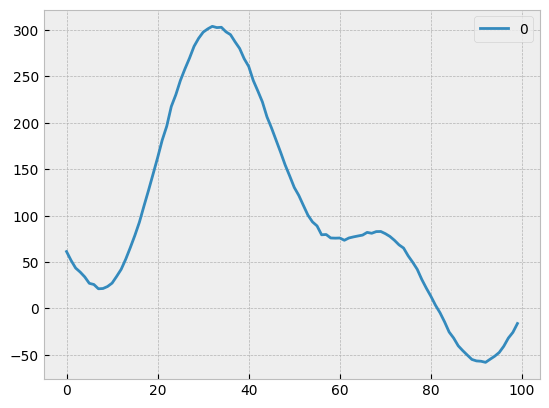

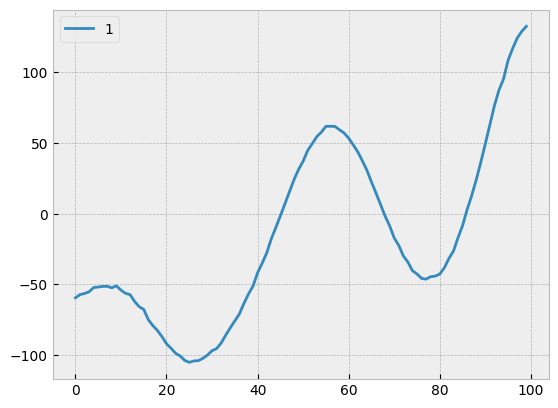

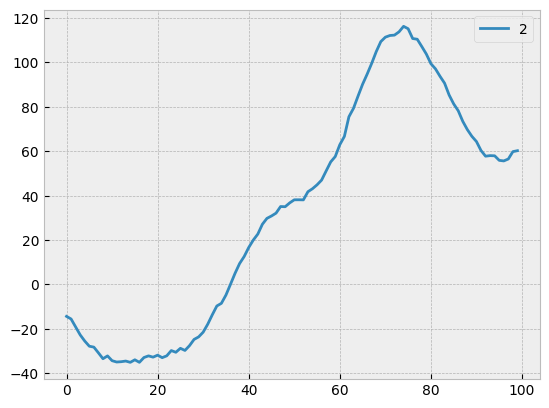

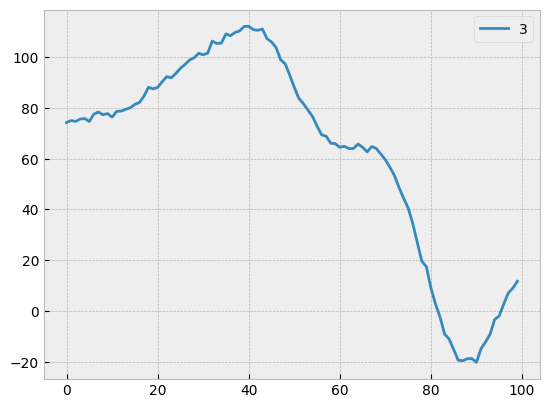

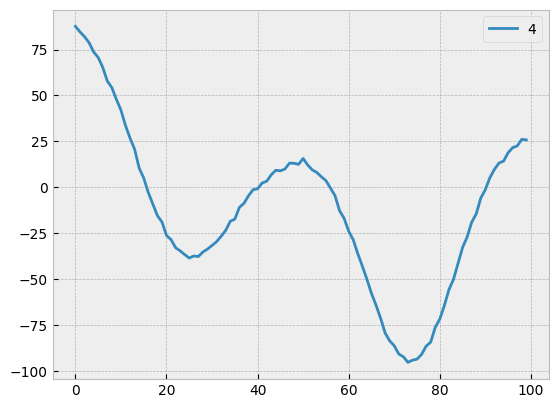

In [9]:
for i in range(M):
    plt.plot(Y[i], label=f"{i}")
    plt.legend()
    plt.show()

In [10]:
model = MAGMA(
    T=None,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    theta0=theta0, 
    Theta=Theta, 
    Sigma=Sigma,
    common_hp_flag=True,
    save_history_flag=False,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [11]:
model.fit()

theta0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=    -Infinity    |proj g|=  1.97093D+09

At iterate    1    f=    -Infinity    |proj g|=  1.03477D+09

At iterate    2    f=    -Infinity    |proj g|=  3.18795D+07

At iterate    3    f=    -Infinity    |proj g|=  7.84767D+07

At iterate    4    f=    -Infinity    |proj g|=  5.19007D+07

At iterate    5    f=    -Infinity    |proj g|=  2.25244D+06

At iterate    6    f=    -Infinity    |proj g|=  1.11750D+07

At iterate    7    f=    -Infinity    |proj g|=  2.97653D+06

At iterate    8    f=    -Infinity    |proj g|=  2.73172D+08

At iterate    9    f=    -Infinity    |proj g|=  3.21448D+08

At iterate   10    f=    -Infinity    |proj g|=  8.50264D+07

At iterate   11    f=    -Infinity    |proj g|=  1.48897D+07

At iterate   12    f=    -Infinity    |proj g|=  5.58567D+07

At iterate   13    

 This problem is unconstrained.



At iterate   25    f=    -Infinity    |proj g|=  6.89558D+07
  ys=-2.014E+04  -gs= 4.476E+02 BFGS update SKIPPED

At iterate   26    f=    -Infinity    |proj g|=  1.56405D+07

At iterate   27    f=    -Infinity    |proj g|=  3.18507D+06

At iterate   28    f=    -Infinity    |proj g|=  5.30014D+05

At iterate   29    f=    -Infinity    |proj g|=  1.44122D+07
  ys=-1.111E+03  -gs= 2.405E+02 BFGS update SKIPPED

At iterate   30    f=    -Infinity    |proj g|=  1.83908D+09

At iterate   31    f=    -Infinity    |proj g|=  2.23127D+06

At iterate   32    f=    -Infinity    |proj g|=  3.43869D+08
  ys=-1.284E+00  -gs= 4.705E-02 BFGS update SKIPPED

At iterate   33    f=    -Infinity    |proj g|=  9.89235D+06

At iterate   34    f=    -Infinity    |proj g|=  2.93598D+07

At iterate   35    f=    -Infinity    |proj g|=  5.78043D+06

At iterate   36    f=    -Infinity    |proj g|=  1.23747D+09
  ys=-3.926E+01  -gs= 4.191E-01 BFGS update SKIPPED

At iterate   37    f=    -Infinity    |proj g|=

  ascent direction in projection gd =    6.4882530806387173E-009

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   59    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   60    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   61    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   62    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   63    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   64    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   65    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   66    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.000E+00 BFGS update SKIPPED

At iterate   67    f=    -Infinity    |proj g|=  3.67502D+07
  ys= 0.000E+00  -gs= 0.00

KeyboardInterrupt: 